Deedsで変形するために色々データを眺める。  
正常ガンに投影するためには、どの患者の左右どちらに正常ガンがあるかを調べる必要がある。  

また、各ユーザに対するスペーシング幅やOriginも揃える必要がある。  

In [2]:
import SimpleITK as sitk
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
from pyobb.obb import OBB

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
statistics_path='/home/kakeya/Desktop/higuchi/20191021/output/statistics.csv'
st_df=pd.read_csv(statistics_path,index_col=0)
cols=['count','count_CCR','count_cys','lumi_mean']
mini_df=st_df[cols].reset_index().fillna(0)
mini_df.head()

In [117]:
#mini_ccr_df=mini_df.query('0<count_CCR<10000')
mini_ccr_df=mini_df.query('0<count_CCR')

In [118]:
ccr_cids=mini_ccr_df['index'].values

In [119]:
## linearBCV -F /home/kakeya/Desktop/higuchi/data/00127/SE2.nii.gz -M /home/kakeya/Desktop/higuchi/data/00015/SE2.nii.gz -O ./affine

In [120]:
#deedsBCV -F /home/kakeya/Desktop/higuchi/data/00127/SE2.nii.gz -M /home/kakeya/Desktop/higuchi/data/00015/SE2.nii.gz -O ./BCVs -A ./affine_matrix.txt

In [121]:
ccrcc.shape

(101, 512, 512)

In [159]:
path=f'/home/kakeya/Desktop/higuchi/data/{str(cid).zfill(5)}/CCRCC.nii.gz'

ccrcc=sitk.GetArrayFromImage(sitk.ReadImage(path))


In [166]:
ccrcc.shape

(271, 512, 512)

In [173]:
ccrcc

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [180]:
ccrcc2=ccrcc.reshape(ccrcc.shape[0],-1)
boolccr=np.all(ccrcc2==0,axis=1)
st=np.where(boolccr.astype(int)==0)[0][0]
en=np.where(boolccr.astype(int)==0)[0][-1]

180

In [123]:
raw_ccrcc.GetSpacing()[0]

0.7020000219345093

In [130]:
cids=mini_ccr_df['index'].values

In [149]:
mini_ccr_df['right']=0
mini_ccr_df['left']=0
mini_ccr_df['slices']=0
mini_ccr_df['spacing_xy']=0.0
mini_ccr_df['spacing_z']=0.0
for i in range(3):
    mini_ccr_df[f'origin_{i}']=0.0


mini_ccr_df.reset_index(drop=True,inplace=True)
for i,cid in enumerate(cids):
    path=f'/home/kakeya/Desktop/higuchi/data/{str(cid).zfill(5)}/SE2.nii.gz'cc
    raw_ccrcc=sitk.ReadImage(path)
    raw_ccrcc.SetSpacing((0.7,0.7,2.0))
    ccrcc=sitk.GetArrayFromImage(raw_ccrcc)
    if raw_ccrcc.GetSpacing()[0]!=raw_ccrcc.GetSpacing()[1]:
        raise ValueError('x spacing and y one are not same.')
    mini_ccr_df.at[i,'spacing_xy']=raw_ccrcc.GetSpacing()[0]
    mini_ccr_df.at[i,'spacing_z']=raw_ccrcc.GetSpacing()[2]
    for j in range(3):
        mini_ccr_df.at[i,f'origin_{j}']=raw_ccrcc.GetOrigin()[j]
    
    right=ccrcc[:,:,256:]
    left=ccrcc[:,:,:256]
    mini_ccr_df.at[i,'slices']=ccrcc.shape[0]
    mini_ccr_df.at[i,'right']=1 if right.sum()>0 else 0
    mini_ccr_df.at[i,'left']=1 if left.sum()>0 else 0    

In [153]:
mini_ccr_df.sort_values('slices').head(20)

,index,count,count_CCR,count_cys,lumi_mean,right,left,slices,spacing_xy,spacing_z,origin,size,origin_0,origin_1,origin_2
88,126,581488,6639.0,0.0,129.052146,0,0,71,0.7,2.0,-134.1_-118.5_1582.5,,-134.102005,-118.476997,1582.500000
95,140,609010,10260.0,0.0,144.732817,0,0,73,0.7,2.0,-87.2_-124.0_1630.5,,-87.246696,-123.964996,1630.500000
30,40,503748,119081.0,236.0,77.606960,0,0,82,0.7,2.0,-174.7_-319.7_-266.9,,-174.658005,-319.657990,-266.899994
101,150,690376,4979.0,0.0,148.489942,0,0,85,0.7,2.0,-146.6_-141.9_1534.0,,-146.582001,-141.895004,1534.000000
46,65,406813,24064.0,24628.0,105.880599,0,0,87,0.7,2.0,-164.7_-279.7_1250.1,,-164.688004,-279.687988,1250.099976
7,10,523632,8602.0,73798.0,113.629730,0,0,91,0.7,2.0,-182.1_-49.6_80.0,,-182.052994,-49.631599,80.000000
11,14,449899,8859.0,69930.0,79.036582,0,0,91,0.7,2.0,-200.0_-75.0_-10.0,,-200.000000,-75.000000,-10.000000
35,47,547062,177968.0,58689.0,89.556973,0,0,93,0.7,2.0,-185.6_-319.6_-346.7,,-185.647995,-319.648010,-346.700012
84,122,679953,7791.0,214.0,133.123704,0,0,93,0.7,2.0,-137.2_-100.5_1685.0,,-137.227005,-100.508003,1685.000000
50,69,382154,4125.0,35.0,179.086175,0,0,95,0.7,2.0,-177.0_-25.0_503.8,,-177.000000,-25.000000,503.799988


In [154]:
mini_ccr_df.sort_values('slices').tail(20)

,index,count,count_CCR,count_cys,lumi_mean,right,left,slices,spacing_xy,spacing_z,origin,size,origin_0,origin_1,origin_2
77,112,457739,44579.0,0.0,127.505528,0,0,151,0.7,2.0,-194.9_-89.4_-30.0,,-194.940002,-89.400002,-30.000000
102,151,431353,35706.0,55320.0,80.827438,0,0,151,0.7,2.0,-199.8_-186.2_1776.5,,-199.830994,-186.158997,1776.500000
91,134,441912,46960.0,0.0,146.642447,0,0,152,0.7,2.0,-175.0_-23.0_624.2,,-175.000000,-23.000000,624.200012
3,5,395548,1847.0,955.0,112.893234,0,0,153,0.7,2.0,-195.0_-61.0_-15.0,,-195.000000,-61.000000,-15.000000
34,46,425192,48616.0,0.0,124.846726,0,0,155,0.7,2.0,-181.6_-326.6_-345.3,,-181.647995,-326.648010,-345.299988
31,41,457291,91198.0,0.0,74.784043,0,0,163,0.7,2.0,-187.6_-325.6_-358.9,,-187.628998,-325.628998,-358.899994
26,34,1039880,247135.0,0.0,90.690433,0,0,163,0.7,2.0,-185.6_-305.6_-298.6,,-185.647995,-305.648010,-298.600006
36,51,387969,73960.0,0.0,128.587913,0,0,172,0.7,2.0,-189.6_-316.6_-419.5,,-189.639008,-316.639008,-419.500000
99,147,316556,53594.0,163.0,135.747451,0,0,176,0.7,2.0,-247.6_-246.6_1948.5,,-247.563995,-246.587997,1948.500000
70,101,282613,61172.0,14593.0,112.206526,0,0,202,0.7,2.0,-170.0_-19.0_586.6,,-170.000000,-19.000000,586.599976


## size of ccrcc

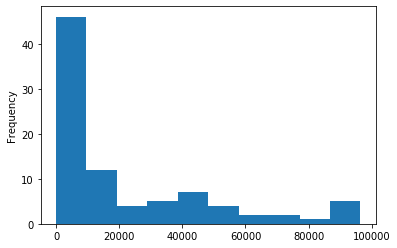

In [15]:
mini_df[mini_df['count_CCR']<100000]['count_CCR'].plot.hist(bins=10)

### lumi_mean

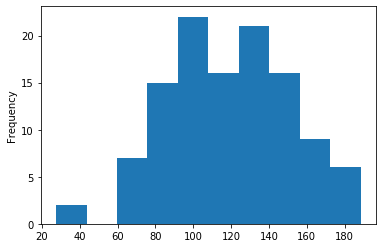

In [10]:
mini_df.sort_values('lumi_mean')['lumi_mean'].plot.hist()

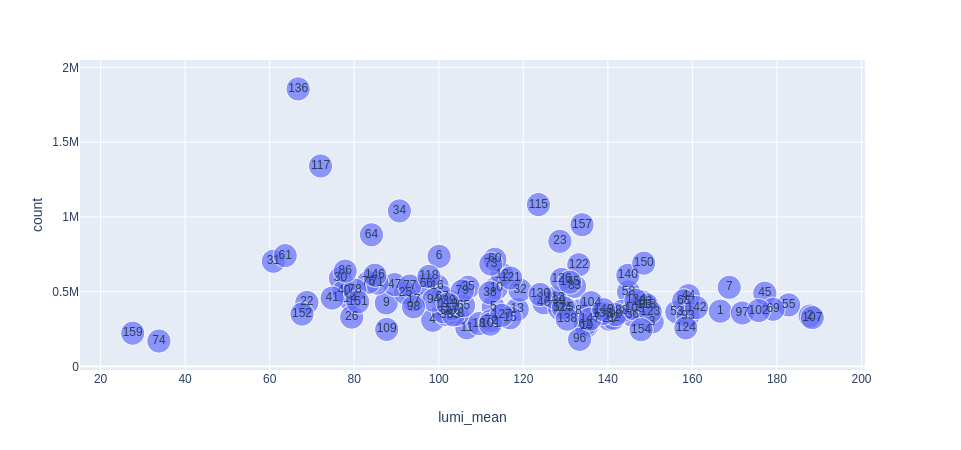

In [24]:
import plotly.express as px 
mini_df['size']=10
fig=px.scatter(mini_df,x='lumi_mean',y='count',text='index',size='size',size_max=17)
fig.show()

In [266]:
import numpy as np
from pathlib import Path
import SimpleITK as sitk
import pandas as pd


class DeedsPreprocessor(object):
    '''
    Deedsを使うときの前処理を行うクラス。
    - スペーシング幅を調整したあとに解像度をpadding/cropで調整する。
    - マスクがある場所の周辺のみをスライスに使用する。どのスライスを採用するかは、DataFrameに保存する
    - ↑の調整をしたデータを新たにディレクトリを作って保存する。
    '''

    def __init__(self, data_dir, save_dir, st_path, kidney='kidney.nii.gz',
                 ccrcc='CCRCC.nii.gz', cyst='cyst.nii.gz', SEs=['SE2.nii.gz', 'SE3.nii.gz']):
        self.data_dir = data_dir
        self.save_dir = save_dir
        self.kidney = kidney
        self.ccrcc = ccrcc
        self.cyst = cyst
        self.SEs = SEs
        self.st_df = pd.read_csv(st_path)
        self.spacing = (0.7, 0.7, 2.0)
        self.df_path = './deeds_statistics.csv'
        cols = ['count', 'count_CCR', 'count_cys', 'lumi_mean']
        self.mini_df = self.st_df[cols].reset_index().fillna(0)

    @staticmethod
    def CropCenter(img: np.array, croped_size=512):
        """
        zyxに並んでいる必要がある。
        Spacing幅を変えたときにxyをcrop
        """
        if img.shape[0] == img.shape[1]:
            raise ValueError('this img is not square.')
        _, y, x = img.shape
        startx = x // 2 - (croped_size // 2)
        return img[:, startx:startx + croped_size, startx:startx + croped_size]

    @staticmethod
    def PadCenter(img: np.array, padded_size=512):
        """
        zyxに並んでいる必要がある。
        Spacing幅を変えたときにxyをpadding
        """
        if img.shape[0] == img.shape[1]:
            raise ValueError('this img is not square.')

        pad_size = padded_size - img.shape[0]
        rpad=pad_size//2
        lpad=int(np.ceil(pad_size/2))
        return np.pad(img, ((rpad,lpad), (rpad,lpad), (0,0)), 'minimum')

    def get_data(self,path: str):
        """pathからスペーシング幅を決めて画像とarrayを返す"""
        if Path(path).is_file():
            img = sitk.ReadImage(str(path))
            img.SetSpacing(self.spacing)
            img_array = sitk.GetArrayFromImage(img)
            return True, img_array
        else:
            print(f'{path} is not exist.')
            return False, np.zeros((100, 100, 100))

    def save_niigz(self,save_path: str, array: np.array):
        array=array.astype(np.int16)
        save_image = sitk.GetImageFromArray(array)
        save_image.SetSpacing(self.spacing)
        if not save_path.parent.is_dir():
            save_path.parent.mkdir()
            print(save_path)
        sitk.WriteImage(save_image, str(save_path), True)

    @staticmethod
    def check_slice_edge(label: np.array):
        """3次元ラベル二値画像。でどのスライスからデータが存在しているかidxの始点終点を返す"""
        label = label.reshape(label.shape[0], -1)
        boollabel = np.all(label == 0, axis=1)
        st = np.where(boollabel.astype(int) == 0)[0][0]
        en = np.where(boollabel.astype(int) == 0)[0][-1]
        return st, en

    def main(self):
        '''DOING:存在しないときの処理'''
        df = self.mini_df.copy()
        df['right'] = 0
        df['left'] = 0
        df['slices'] = 0
        df['spacing_xy'] = 0.0
        df['spacing_z'] = 0.0
        df['up_kid_slice'] = 0
        df['down_kid_slice'] = 0
        df['st'] = 0
        df['en'] = 0

        for i in range(3):
            df[f'origin_{i}'] = 0.0

        cids = df['index'].values
        df.reset_index(drop=True, inplace=True)
        for i, cid in enumerate(cids):

            load_dir = Path(f'{self.data_dir}/{str(cid).zfill(5)}')
            save_dir = Path(f'{self.save_dir}/{str(cid).zfill(5)}')

            load_paths = [load_dir / p for p in [self.SEs[0], self.SEs[1], self.kidney, self.ccrcc, self.cyst]]
            save_paths = [save_dir / p for p in [self.SEs[0], self.SEs[1], self.kidney, self.ccrcc, self.cyst]]
            # パスがあるかどうかのboolとarrayのリスト
            load_datas = [self.get_data(path) for path in load_paths]
            print(load_datas[0][0])

            se2 = load_datas[0][0]
            se3 = load_datas[1][0]
            ccr_arr = load_datas[3][1]
            kid_arr = load_datas[2][1]
            label_datas=load_datas[2:]
            

            if not (se2 and se3):
                print(f'{cid} is not exist SEs.')
                continue

            whole_label_arr = np.copy(kid_arr)
            for exist, array in label_datas:
                if not exist:
                    continue
                else:
                    whole_label_arr = np.logical_or(whole_label_arr, array)
                    
            # ラベルの始点・終点を調べている
            st, en = self.check_slice_edge(whole_label_arr)
            df.at[i, ['st', 'en']] = st, en

            for (exist, array), save_path in zip(load_datas, save_paths):
                if exist==False:
                    print('this array is not exist.')
                    continue
                print(st,en)
                imst=max(st,st-10)
                imen=en+10
                
                array = array[imst:imen, :, :]
                print(array.shape)
                if array.shape[2] > 512:
                    array = self.CropCenter(array)
                else:
                    array = self.PadCenter(array)
                self.save_niigz(save_path,array)

            # ガンがどっちにあるかを調べている。
            right = ccr_arr[:, :, 256:]
            left = ccr_arr[:, :, :256]
            df.at[i, 'slices'] = ccr_arr.shape[0]
            df.at[i, 'right'] = 1 if right.sum() > 0 else 0
            df.at[i, 'left'] = 1 if left.sum() > 0 else 0

        df.to_csv(self.df_path)


In [267]:
data_dir='/home/kakeya/Desktop/higuchi/data/'
save_dir='/home/kakeya/ssd/deeds_data'
st_path='/home/kakeya/Desktop/higuchi/20191021/output/statistics.csv'
dp=DeedsPreprocessor(data_dir,save_dir,st_path)
dp.main()

/home/kakeya/Desktop/higuchi/data/00000/SE2.nii.gz is not exist.
/home/kakeya/Desktop/higuchi/data/00000/SE3.nii.gz is not exist.
/home/kakeya/Desktop/higuchi/data/00000/kidney.nii.gz is not exist.
/home/kakeya/Desktop/higuchi/data/00000/CCRCC.nii.gz is not exist.
/home/kakeya/Desktop/higuchi/data/00000/cyst.nii.gz is not exist.
False
0 is not exist SEs.
/home/kakeya/Desktop/higuchi/data/00001/CCRCC.nii.gz is not exist.
True
40 111
(81, 512, 512)
40 111
(81, 512, 512)
40 111
(81, 512, 512)
this array is not exist.
40 111
(81, 512, 512)
True
53 110
(67, 512, 512)
53 110
(67, 512, 512)
53 110
(67, 512, 512)
53 110
(67, 512, 512)
53 110
(67, 512, 512)
/home/kakeya/Desktop/higuchi/data/00003/cyst.nii.gz is not exist.
True
63 118
(65, 512, 512)
/home/kakeya/ssd/deeds_data/00003/SE2.nii.gz
63 118
(65, 512, 512)
63 118
(65, 512, 512)
63 118
(65, 512, 512)
this array is not exist.
True
4 99
(97, 512, 512)
/home/kakeya/ssd/deeds_data/00004/SE2.nii.gz
4 99
(97, 512, 512)
4 99
(97, 512, 512)
4 99

KeyboardInterrupt: 